In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [41]:
class NeuronalNetVector(nn.Module):
        def __init__(self):
            super(NeuronalNetVector, self).__init__()
            self.lin1 = nn.Linear(8,15)
            #Größer als 8,3333
            #Kleiner als 16
            self.lin2 = nn.Linear(15,15)
            self.lin3 = nn.Linear(15,3)
        def forward(self,x):
            x = self.lin1(x)
            x = F.relu(x)
            x = F.relu(self.lin2(x))
            x = F.relu(self.lin3(x))
            x = F.softmax(x,dim=0)
            return x

In [42]:
#Die Tore der einzelnen Mannschaften pro Spiel aus den matches in eine Liste schreiben
def inputValuesVector(gameList, df_stats,inputList):
    for match in gameList:
        homeTeam = match.iat[0,0]
        awayTeam = match.iat[0,1]
        input_values= df_stats[df_stats['HomeTeam']==homeTeam]
        input_values= input_values[input_values['AwayTeam']==awayTeam]
        input_values= input_values.reset_index(drop=True)
        input_values = input_values[:-1]
        inputList.append(input_values.loc[:,['FTHG','FTAG']])

In [43]:
#Methode um aus einer Liste eine Tensorliste mit Floatwerten generieren
def dfToTensor(dfList, tensorList):
    for df in dfList:
        tensor = torch.FloatTensor(df.values).view(8)
        tensorList.append(tensor)

In [44]:
def dfToTensor_forTarget(dfList, tensorList):
    for df in dfList:
        tensor = torch.FloatTensor(df).view(3)
        tensorList.append(tensor)

In [45]:
#Outputvalues generieren, bei einem target als Vector
def targetValuesVector(gameList, df_stats,targetList):
    for match in gameList:
        homeTeam = match.iat[0,0]
        awayTeam = match.iat[0,1]
        target_values= df_stats[df_stats['HomeTeam']==homeTeam]
        target_values= target_values[target_values['AwayTeam']==awayTeam]
        target_values= target_values.reset_index(drop=True)
        target_values = target_values.tail(1)
        target_values = target_values.loc[:,['FTHG','FTAG']]
        homegoals = target_values.loc[:,['FTHG']].iloc[0]['FTHG']
        awaygoals = target_values.loc[:,['FTAG']].iloc[0]['FTAG']
        if homegoals > awaygoals:
            df_target=[[1.,0.,0.]]
        if homegoals == awaygoals:
            df_target=[[0.,1.,0.]]
        if homegoals < awaygoals:
            df_target=[[0.,0.,1.]]
        targetList.append(df_target)

In [46]:
#Pfade Fabian
#/Users/fabian-maltemoller/Developer/Ki/KI_Daten/09_10-13_14.csv
#/Users/fabian-maltemoller/Developer/Ki/KI_Daten/10_11-14_15.csv
#/Users/fabian-maltemoller/Developer/Ki/KI_Daten/11_12-15_16.csv
#/Users/fabian-maltemoller/Developer/Ki/KI_Daten/12_13-16_17.csv
#/Users/fabian-maltemoller/Developer/Ki/KI_Daten/13_14-17_18.csv
#/Users/fabian-maltemoller/Developer/Ki/KI_Daten/14_15-18_19.csv

#C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\09_10-13_14.csv
#C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\10_11-14_15.csv
#C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\11_12-15_16.csv
#C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\12_13-16_17.csv
#C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\13_14-17_18.csv
#C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\14_15-18_19.csv

In [47]:
def vectorInputTarget(path,inputListe,targetListe):
    topTeams = pd.read_csv(path, sep=';')
    df = pd.DataFrame(topTeams, columns = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR'])
    df_names = df.drop_duplicates(['HomeTeam','AwayTeam'],keep = 'last')
    df_names = df_names[['HomeTeam','AwayTeam']]
    gameListe = []
    for row in df_names.itertuples():
        data = [[row.HomeTeam,row.AwayTeam]]
        gameListe.append(pd.DataFrame(data))
    inputValuesVector(gameListe, df,inputListe)
    targetValuesVector(gameListe,df,targetListe)

In [48]:
inputList_0910_1314_Vector = []
targetList_0910_1314_Vector = []
vectorInputTarget('/Users/fabian-maltemoller/Developer/Ki/KI_Daten/09_10-13_14.csv',inputList_0910_1314_Vector,targetList_0910_1314_Vector)
#vectorInputTarget('C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\09_10-13_14.csv',inputList_0910_1314,outputList_0910_1314)

inputList_1011_1415_Vector = []
targetList_1011_1415_Vector = []
vectorInputTarget('/Users/fabian-maltemoller/Developer/Ki/KI_Daten/10_11-14_15.csv',inputList_1011_1415_Vector,targetList_1011_1415_Vector)
#vectorInputTarget('C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\10_11-14_15.csv',inputList_1011_1415,outputList_1011_1415)

inputList_1112_1516_Vector = []
targetList_1112_1516_Vector = []
vectorInputTarget('/Users/fabian-maltemoller/Developer/Ki/KI_Daten/11_12-15_16.csv',inputList_1112_1516_Vector,targetList_1112_1516_Vector)
#vectorInputTarget('C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\11_12-15_16.csv',inputList_1112_1516,outputList_1112_1516)

inputList_1213_1617_Vector = []
targetList_1213_1617_Vector = []
vectorInputTarget('/Users/fabian-maltemoller/Developer/Ki/KI_Daten/12_13-16_17.csv',inputList_1213_1617_Vector,targetList_1213_1617_Vector)
#vectorInputTarget('C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\12_13-16_17.csv',inputList_1213_1617,outputList_1213_1617)

inputList_1314_1718_Vector = []
targetList_1314_1718_Vector = []
vectorInputTarget('/Users/fabian-maltemoller/Developer/Ki/KI_Daten/13_14-17_18.csv',inputList_1314_1718_Vector,targetList_1314_1718_Vector)
#vectorInputTarget('C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\13_14-17_18.csv',inputList_1314_1718,outputList_1314_1718)

inputList_1415_1819_Vector = []
targetList_1415_1819_Vector = []
vectorInputTarget('/Users/fabian-maltemoller/Developer/Ki/KI_Daten/14_15-18_19.csv',inputList_1415_1819_Vector,targetList_1415_1819_Vector)
#vectorInputTarget('C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\14_15-18_19.csv',inputList_1415_1819,outputList_1415_1819)

In [49]:
#Leere Dataframes löschen
for i in range(len(inputList_1415_1819_Vector)):
    if inputList_1415_1819_Vector[i].empty:
        print(i)

11
14
32
46
54
63
85
92
97
109
116


In [50]:
inputList_1415_1819_Vector.pop(11)
inputList_1415_1819_Vector.pop(13)
inputList_1415_1819_Vector.pop(30)
inputList_1415_1819_Vector.pop(43)
inputList_1415_1819_Vector.pop(50)
inputList_1415_1819_Vector.pop(58)
inputList_1415_1819_Vector.pop(79)
inputList_1415_1819_Vector.pop(85)
inputList_1415_1819_Vector.pop(89)
inputList_1415_1819_Vector.pop(100)
inputList_1415_1819_Vector.pop(106)

targetList_1415_1819_Vector.pop(11)
targetList_1415_1819_Vector.pop(13)
targetList_1415_1819_Vector.pop(30)
targetList_1415_1819_Vector.pop(43)
targetList_1415_1819_Vector.pop(50)
targetList_1415_1819_Vector.pop(58)
targetList_1415_1819_Vector.pop(79)
targetList_1415_1819_Vector.pop(85)
targetList_1415_1819_Vector.pop(89)
targetList_1415_1819_Vector.pop(100)
targetList_1415_1819_Vector.pop(106)

print(len(inputList_1415_1819_Vector))
print(len(targetList_1415_1819_Vector))

110
110


In [51]:
train_input_tensor = []
dfToTensor(inputList_0910_1314_Vector,train_input_tensor)
dfToTensor(inputList_1011_1415_Vector,train_input_tensor)
dfToTensor(inputList_1112_1516_Vector,train_input_tensor)
dfToTensor(inputList_1213_1617_Vector,train_input_tensor)
dfToTensor(inputList_1314_1718_Vector,train_input_tensor)

test_input_tensor= []
dfToTensor(inputList_1415_1819_Vector,test_input_tensor)

In [52]:
train_target_tensor = []
dfToTensor_forTarget(targetList_0910_1314_Vector,train_target_tensor)
dfToTensor_forTarget(targetList_1011_1415_Vector,train_target_tensor)
dfToTensor_forTarget(targetList_1112_1516_Vector,train_target_tensor)
dfToTensor_forTarget(targetList_1213_1617_Vector,train_target_tensor)
dfToTensor_forTarget(targetList_1314_1718_Vector,train_target_tensor)

test_target_tensor = []
dfToTensor_forTarget(targetList_1415_1819_Vector,test_target_tensor)

In [53]:
print(len(train_input_tensor))
print(len(train_target_tensor))
print(len(test_input_tensor))
print(len(test_target_tensor))

710
710
110
110


In [57]:
net = NeuronalNetVector()

In [81]:
class Evaluation():
    def __init__(self, net, n_epoch):
        self.net = net
        self.n_epoch = n_epoch
        self.criterion = nn.L1Loss()
        #self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
        #self.optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)
        
    def train(self, input_vector, target_vector):
        for epoch in range(n_epoch):
            running_loss = 0.0
            for i in range(len(input_vector)):
                self.optimizer.zero_grad()
                outputs = self.net(input_vector[i])
                loss = self.criterion(outputs, target_vector[i])
                loss.backward()
                self.optimizer.step()
                running_loss += loss.item()
                if i % 710 == 709:
                    print(running_loss/ 710)
        print('Finished Training')
    
    def test(self, input_vector, target_vector):
        correct = 0
        total = 0
        with torch.no_grad():
            for i in range(len(input_vector)):
                outputs = self.net(input_vector[i])
                if(torch.argmax(outputs) == torch.argmax(target_vector[i])):
                    correct = correct+1
        accuracy = correct/len(input_vector)
        return(accuracy)

In [85]:
accuracy_train = {}
accuracy_test = {}
for i in range(20):
    test_eval = Evaluation(NeuronalNetVector(),30)
    test_eval.train(train_input_tensor,train_target_tensor)
    test_result = test_eval.test(test_input_tensor,test_target_tensor)
    accuracy_test[i] = test_result
    train_test_result = test_eval.test(train_input_tensor,train_target_tensor)
    accuracy_train[i] = train_test_result

0.4046427330762987
0.3683101150607297
0.36225052565163246
0.36088157616553435
0.3603447662671308
0.36006324656102895
0.3598906072857485
0.35977248544803664
0.35968413727836196
0.35961501686542535
0.3595572266590423
0.3595063399333856
0.3594597779950626
0.359415951575024
0.3593743714890287
0.35933324275939293
0.3592914548956375
0.35924973429550056
0.3592070347855805
0.3591642839366127
0.3591192729027529
0.3590668742375528
0.3590079353207626
0.35894320445512573
0.35887389646884943
0.35879707398942257
0.3587170766957008
0.3586321883909411
0.35854319441011806
0.35845311575472716
Finished Training
0.4727272727272727
0.46056338028169014
0.427222695778793
0.39732518111631066
0.36875699002518725
0.3627433406004623
0.3612649844537936
0.3606688057320023
0.36036031690864545
0.36017175424895087
0.36004405328268746
0.3599513645954438
0.35988026996371275
0.359822927333184
0.3597744446517228
0.359731880194673
0.3596933885850837
0.3596571030733775
0.3596232753539389
0.35958981188783984
0.3595559064926

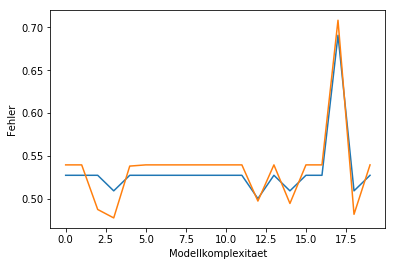

In [86]:
test_tuple = sorted(accuracy_test.items())
train_tuple = sorted(accuracy_train.items())

test_x, test_y = zip(*test_tuple)
test_y = [1-val for val in test_y]
train_x, train_y = zip(*train_tuple)
train_y = [1-val for val in train_y]

test_line = plt.plot(test_x, test_y, label='Testdaten')
trainings_line = plt.plot(train_x , train_y , label = 'Trainingsdaten')

plt.xlabel("Modellkomplexitaet")
plt.ylabel("Fehler")
plt.show()

In [70]:
#Quantitative Evaluierung 
correct = 0
total = 0
with torch.no_grad():
    for i in range(len(test_input_tensor)) :
        outputs = net(test_input_tensor[i])
        if (torch.argmax(outputs) == torch.argmax(test_target_tensor[i])):
            correct = correct+1
print(correct / len(test_input_tensor))

0.4727272727272727


In [235]:
a = 0
for data in test_loader:
    a = a+1
print(a)

55


In [ ]:
import matplotlib.pylab as plt 
test_tuple = sorted(a.items())
train_tuple = sorted(accuracy_dict_train.items())

test_x, test_y = zip(*test_tuple)
test_y = [1-val for val in test_y]
train_x, train_y = zip(*train_tuple)
train_y = [1-val for val in train_y]